In [46]:
import pandas as pd

In [1]:

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("dados_roubo_celulares_2023").config('spark.master', 'local').getOrCreate()
df = spark.read.load (r"C:\Users\odair\OneDrive\Área de Trabalho\usando_pyspark\novo_dados_crim_2023d.csv", format="csv", sep= ',', inferSchema="True", header="true")
df.show(5)


+------+------+--------------+--------------+--------------+--------------+-------------------+----------------+---------------+--------------+------------+---------+------------------------+--------------------+------+--------------------+----------+---+-----------------+-----------------+--------------+-----+--------------------+--------------------+-----------------------+--------------------+--------------------+-------------+---------+----------+-----------+------------+-------------+----+--------------+-----+-----------+---------+-------------+--------+-----------------+-----------+--------------+----------+-------------+----------+--------------+-----------------+--------------------+--------------+----------+------------------+-------------+-------------+
|ANO_BO|NUM_BO|NUMERO_BOLETIM|   BO_INICIADO|    BO_EMITIDO|DATAOCORRENCIA|     HORAOCORRENCIA|PERIDOOCORRENCIA|DATACOMUNICACAO|DATAELABORACAO|  BO_AUTORIA|FLAGRANTE|NUMERO_BOLETIM_PRINCIPAL|          LOGRADOURO|NUMERO|       

In [2]:
display(df)

DataFrame[ANO_BO: int, NUM_BO: int, NUMERO_BOLETIM: string, BO_INICIADO: string, BO_EMITIDO: string, DATAOCORRENCIA: string, HORAOCORRENCIA: timestamp, PERIDOOCORRENCIA: string, DATACOMUNICACAO: string, DATAELABORACAO: string, BO_AUTORIA: string, FLAGRANTE: string, NUMERO_BOLETIM_PRINCIPAL: string, LOGRADOURO: string, NUMERO: int, BAIRRO: string, CIDADE: string, UF: string, LATITUDE: string, LONGITUDE: string, DESCRICAOLOCAL: string, EXAME: string, SOLUCAO: string, DELEGACIA_NOME: string, DELEGACIA_CIRCUNSCRICAO: string, ESPECIE: string, RUBRICA: string, DESDOBRAMENTO: string, STATUS: string, TIPOPESSOA: string, VITIMAFATAL: string, NATURALIDADE: string, NACIONALIDADE: string, SEXO: string, DATANASCIMENTO: string, IDADE: int, ESTADOCIVIL: string, PROFISSAO: string, GRAUINSTRUCAO: string, CORCUTIS: string, NATUREZAVINCULADA: string, TIPOVINCULO: string, RELACIONAMENTO: string, PARENTESCO: string, PLACA_VEICULO: string, UF_VEICULO: string, CIDADE_VEICULO: string, DESCR_COR_VEICULO: strin

In [3]:
df.printSchema()

root
 |-- ANO_BO: integer (nullable = true)
 |-- NUM_BO: integer (nullable = true)
 |-- NUMERO_BOLETIM: string (nullable = true)
 |-- BO_INICIADO: string (nullable = true)
 |-- BO_EMITIDO: string (nullable = true)
 |-- DATAOCORRENCIA: string (nullable = true)
 |-- HORAOCORRENCIA: timestamp (nullable = true)
 |-- PERIDOOCORRENCIA: string (nullable = true)
 |-- DATACOMUNICACAO: string (nullable = true)
 |-- DATAELABORACAO: string (nullable = true)
 |-- BO_AUTORIA: string (nullable = true)
 |-- FLAGRANTE: string (nullable = true)
 |-- NUMERO_BOLETIM_PRINCIPAL: string (nullable = true)
 |-- LOGRADOURO: string (nullable = true)
 |-- NUMERO: integer (nullable = true)
 |-- BAIRRO: string (nullable = true)
 |-- CIDADE: string (nullable = true)
 |-- UF: string (nullable = true)
 |-- LATITUDE: string (nullable = true)
 |-- LONGITUDE: string (nullable = true)
 |-- DESCRICAOLOCAL: string (nullable = true)
 |-- EXAME: string (nullable = true)
 |-- SOLUCAO: string (nullable = true)
 |-- DELEGACIA_NO

In [27]:
novo_dataset=df.select('DATAOCORRENCIA','PERIDOOCORRENCIA','CIDADE','BAIRRO','LOGRADOURO','MARCA_CELULAR','QUANT_CELULAR')
novo_dataset.show()

+--------------+----------------+------------+--------------------+--------------------+-------------+-------------+
|DATAOCORRENCIA|PERIDOOCORRENCIA|      CIDADE|              BAIRRO|          LOGRADOURO|MARCA_CELULAR|QUANT_CELULAR|
+--------------+----------------+------------+--------------------+--------------------+-------------+-------------+
|     31/1/2023|         A NOITE|     S.PAULO|             BUTANTA|            RUA MMDC|        Apple|            1|
|     31/1/2023|         A NOITE|     S.PAULO|             BUTANTA|            RUA MMDC|       Xiaomi|            1|
|     31/1/2023|         A NOITE|  EMBU-GUACU|Loteamento Vale F...|  Estrada do Baygton|      Samsung|            1|
|     31/1/2023|         A TARDE|     S.ANDRE|               Bangú|Avenida Antônio C...|      Samsung|            1|
|     31/1/2023|         A NOITE|     S.ANDRE|    CIDADE SÃO JORGE|        RUA AMAZONAS|        Apple|            1|
|      1/2/2023|    DE MADRUGADA|     JUNDIAI|   PARQUE INDUSTRI

In [28]:
from pyspark.sql.functions import when, count,col

# Contando as células nulas
nulos = novo_dataset.select([count(when(col(c).isNull(), c)).alias(c) for c in novo_dataset.columns])

# Exibindo os resultados
nulos.show()

tamanho = novo_dataset.count()
print("Tamanho DF:", tamanho)

# Podemos verificar que temos mais ou menos 5% dos dados núlos no campo chamado Logradouro ou rua.


+--------------+----------------+------+------+----------+-------------+-------------+
|DATAOCORRENCIA|PERIDOOCORRENCIA|CIDADE|BAIRRO|LOGRADOURO|MARCA_CELULAR|QUANT_CELULAR|
+--------------+----------------+------+------+----------+-------------+-------------+
|             0|               0|    70|   244|       932|           10|           11|
+--------------+----------------+------+------+----------+-------------+-------------+

Tamanho DF: 17392


O tamanho do dataframe é: 17392


In [6]:
periodo = novo_dataset.groupBy(novo_dataset['PERIDOOCORRENCIA']).agg({'PERIDOOCORRENCIA': 'count'}).withColumnRenamed('count(PERIDOOCORRENCIA)', 'Frequência').orderBy('Frequência', ascending=False).show()


+----------------+----------+
|PERIDOOCORRENCIA|Frequência|
+----------------+----------+
|         A NOITE|      7344|
|         A TARDE|      3599|
|      PELA MANHÃ|      3294|
|    DE MADRUGADA|      3098|
| EM HORA INCERTA|        57|
+----------------+----------+



In [7]:
from pyspark.sql.functions import desc
# análise das cidades com mais crimes
top_cidades = novo_dataset.groupBy('CIDADE').count().orderBy(desc('count'))
top_cidades.show()

+--------------------+-----+
|              CIDADE|count|
+--------------------+-----+
|             S.PAULO| 9368|
| S.BERNARDO DO CAMPO|  635|
|             S.ANDRE|  565|
|           GUARULHOS|  521|
|            CAMPINAS|  392|
|             DIADEMA|  366|
|              OSASCO|  296|
|     ITAQUAQUECETUBA|  205|
|              SUZANO|  193|
|            SOROCABA|  188|
|ITAPECERICA DA SERRA|  181|
|                MAUA|  177|
|              SUMARE|  176|
|             GUARUJA|  172|
|        PRAIA GRANDE|  170|
|             JUNDIAI|  161|
|      RIBEIRAO PRETO|  141|
|     TABOAO DA SERRA|  126|
|   S.JOSE DOS CAMPOS|  122|
|         CARAPICUIBA|  121|
+--------------------+-----+
only showing top 20 rows



In [24]:
# análise dos bairros com mais crimes
top_bairros = novo_dataset.groupBy('BAIRRO').count().orderBy(desc('count'))
top_bairros.show()

+--------------------+-----+
|              BAIRRO|count|
+--------------------+-----+
|           REPUBLICA|  374|
|              CENTRO|  311|
|              Centro|  309|
|                null|  244|
|       CAPAO REDONDO|  177|
|         CAMPO LIMPO|  161|
|          CONSOLACAO|  154|
|           República|  132|
|        VILA MARIANA|  126|
|                  SE|  124|
|          Consolação|  123|
|           PINHEIROS|  123|
|              GRAJAU|  119|
|             JARAGUA|  116|
|         JD SÃO LUIS|  112|
|Centro Histórico ...|  105|
|              SACOMA|  104|
|                PARI|   98|
|   CIDADE TIRADENTES|   98|
|          ITAIM BIBI|   97|
+--------------------+-----+
only showing top 20 rows



In [26]:
# análise das ruas mais violentas
top_ruas = novo_dataset.groupBy('LOGRADOURO').count().orderBy(desc('count'))
top_ruas.show()

+--------------------+-----+
|          LOGRADOURO|count|
+--------------------+-----+
|                null|  932|
|Rodovia Régis Bit...|   91|
|Rodovia President...|   84|
|  PRAÇA DA REPUBLICA|   79|
| Rodovia Fernão Dias|   73|
|AVENIDA CARLOS DE...|   72|
|         RUA AUGUSTA|   67|
|Rua Doutor Humber...|   66|
|RODOVIA PRESIDENT...|   64|
|  Praça da República|   62|
|   Rua da Consolação|   60|
|  Rodovia Anhanguera|   47|
|Avenida Cruzeiro ...|   45|
|        RUA CANINANA|   42|
|Avenida Brigadeir...|   41|
|         PRAÇA DA SE|   41|
|ACESSO RODOVIA CÔ...|   40|
|         Rua Augusta|   39|
|Estrada Portão do...|   37|
|Ponte Edson Godoy...|   36|
+--------------------+-----+
only showing top 20 rows



In [33]:
#análise das marcas de celular mais roubadas
top_quantidades = novo_dataset.groupBy('MARCA_CELULAR').count().orderBy(desc('count'))
top_quantidades.show()

+-------------+-----+
|MARCA_CELULAR|count|
+-------------+-----+
|      Samsung| 6343|
|     Motorola| 4098|
|        Apple| 4085|
|       Xiaomi| 1453|
|       Outros|  659|
|           LG|  405|
|         Asus|  139|
|     Positivo|   59|
|        Nokia|   53|
|   Multilaser|   37|
|         Sony|   16|
|         null|   10|
|      Alcatel|    9|
|       Huawei|    9|
|      Siemens|    5|
|       Lenovo|    3|
|          BLU|    3|
|          HPE|    2|
|    Microsoft|    2|
|      SAMSUNG|    1|
+-------------+-----+
only showing top 20 rows



In [30]:
#análise das marcas de celular mais roubadas
top_marcas = novo_dataset.groupBy('QUANT_CELULAR').count().orderBy(desc('count'))
top_marcas.show()

+-------------+-----+
|QUANT_CELULAR|count|
+-------------+-----+
|            1|16978|
|            2|  288|
|            3|   50|
|            4|   45|
|         null|   11|
|            5|    9|
|           10|    3|
|           26|    2|
|           12|    2|
|            6|    1|
|           41|    1|
|           35|    1|
|           23|    1|
+-------------+-----+



In [49]:
df_pandas = df.toPandas()


F:\INSTALAR_CONDA\lib\site-packages\pandas\core\indexes\extension.py:101: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(result, name=self.name)


IndexError: index 0 is out of bounds for axis 0 with size 0

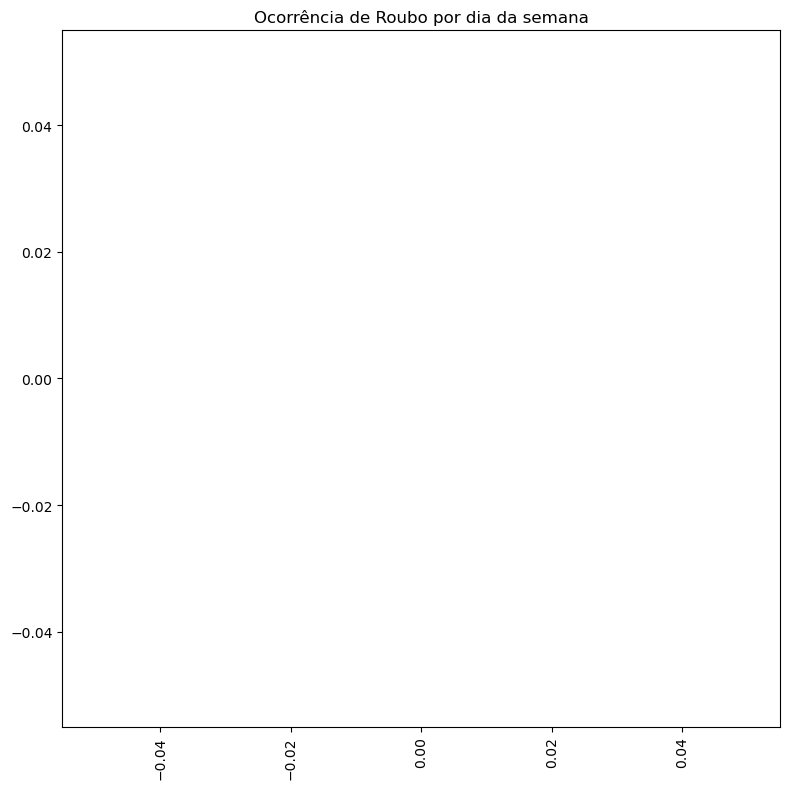

In [50]:
# Agora vamos tratar a variável df_pandas
# trazendo dados para o formato português Brasil
# Transformamos dados para filtrar quais dias da semana possuem maior ocorrência de roubo 
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df_pandas['DATAOCORRENCIA'] =  pd.to_datetime(df_pandas['DATAOCORRENCIA'], format= '%d/%m/%Y')
df_pandas['DATAOCORRENCIA'] = df_pandas['DATAOCORRENCIA'].dt.date
df_pandas['ANO_OCORRENCIA'] = pd.DatetimeIndex(df_pandas['DATAOCORRENCIA']).year
df_pandas['MES_OCORRENCIA'] = pd.DatetimeIndex(df_pandas['DATAOCORRENCIA']).month
df_pandas['DIA_OCORRENCIA'] = pd.DatetimeIndex(df_pandas['DATAOCORRENCIA']).day
df_pandas['DIA_SEMANA_OCORRENCIA'] = pd.DatetimeIndex(df_pandas['DATAOCORRENCIA']).day_name(locale = 'pt_BR.utf8')

plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
df_pandas.DIA_SEMANA_OCORRENCIA.value_counts().plot(kind='bar', title='Ocorrência de Roubo por dia da semana', color=['#1F77B4', '#FF7F0E'])
